In [13]:
import igl
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy
from meshplot import plot, subplot, interact

mesh_dir = 'SHREC11/'

In [14]:
def readLbl(fileName):
    file1 = open(fileName, 'r')
    Lines = file1.readlines()

    count = 0

    lbls = np.empty([600])
    # Strips the newline character
    for line in Lines:
        count += 1
        text = line.strip()[1:].split('.')
        text[1] = text[1].split(' ')[1]
        lbls[int(text[0])] = int(text[1])
        #print("Line{}: {}".format(count, )))
    return lbls

def lbl_2_lblMat(lbls):
    labelMat = igl.all_pairs_distances(lbls,lbls,False)
    labelMat = np.where(labelMat > 0.5, 1, 0)
    return labelMat

def compareGroups(grpa,grpb,lbl,disSMat):
    grpA_idx = np.reshape(np.where(lbl == grpa),(20,))
    grpB_idx = np.reshape(np.where(lbl == grpb),(20,))
    A = disSMat[grpA_idx,:]
    B = A[:,grpB_idx]

    result = np.mean(B)

    if (grpa - grpb < 0.1):
        result = result * 20 / 19

    return result

In [15]:
def obj_2_adj(fileName):
    v, f = igl.read_triangle_mesh(mesh_dir + fileName)
    distances = igl.all_pairs_distances(v,v,False)
    adJ = igl.adjacency_matrix(f).toarray() * distances
    return adJ

def adj_2_features(adj):
    #print([np.mean(adj),np.max(adj),np.std(adj)])
    #hist = np.histogram(adj,bins = np.arange(0,0.5,0.02),density=True)
    #generic_feat = np.array([np.mean(adj),np.max(adj),np.std(adj)])
    hist = np.histogram(adj,bins = 20,density=True)[0]
    #print(hist[0])


    return hist


In [16]:
fs = []

for i in range(600):
    fName = 'T' + str(i) + '.obj'
    adj = obj_2_adj(fName)
    f = adj_2_features(adj)
    fs.append(f)

fs = np.array(fs)

In [17]:
disSimMat = igl.all_pairs_distances(fs,fs,False)

In [18]:
disSimMat = disSimMat / np.max(disSimMat)
disSimMat

array([[0.        , 0.13710129, 0.10024121, ..., 0.10485369, 0.12703305,
        0.11596238],
       [0.13710129, 0.        , 0.03686427, ..., 0.03225812, 0.01008918,
        0.02114981],
       [0.10024121, 0.03686427, 0.        , ..., 0.00465308, 0.02679708,
        0.01573342],
       ...,
       [0.10485369, 0.03225812, 0.00465308, ..., 0.        , 0.02218379,
        0.01113543],
       [0.12703305, 0.01008918, 0.02679708, ..., 0.02218379, 0.        ,
        0.01108385],
       [0.11596238, 0.02114981, 0.01573342, ..., 0.01113543, 0.01108385,
        0.        ]])

In [19]:
label = readLbl(mesh_dir+'labels.txt')
compResult = compareGroups(0,1,label,disSimMat)
np.mean(compResult)

0.2196311108331248

In [20]:
mat = np.empty([30,30])
compSelf = []
compOthers = []
for i in range(30):
    for j in range(0,i+1):
        compResult = compareGroups(i,j,label,disSimMat)
        mat[i,j] = compResult
        mat[j,i] = compResult
        if (i == j):
            compSelf.append(compResult)
        else:
            compOthers.append(compResult)



0.06147982021532571 0.04795081739350609
0.09892546954803162 0.060643840381315726


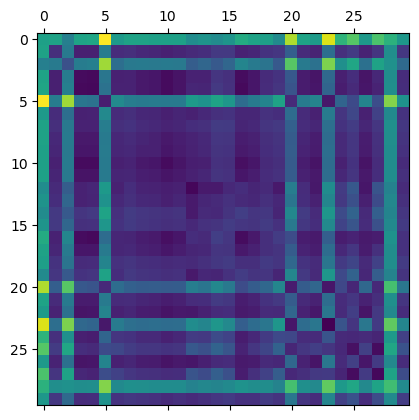

In [21]:
plt.matshow(mat)
print(np.mean(compSelf),np.std(compSelf))
print(np.mean(compOthers),np.std(compOthers))

In [22]:
self_mean = np.mean(compSelf)
self_std = np.std(compSelf)
others_mean = np.mean(compOthers)
others_std = np.std(compOthers)

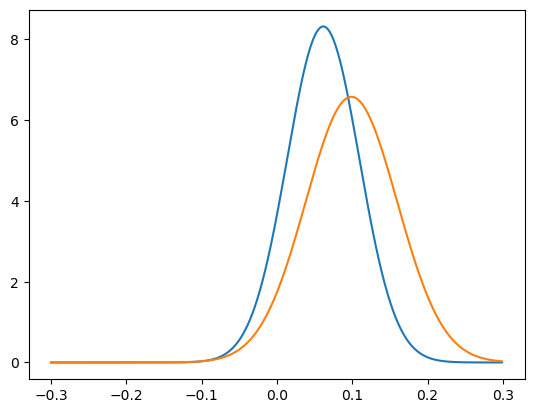

In [23]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-0.3, 0.3, 0.001)

#plt.hist(compSelf)


plt.plot(x_axis, norm.pdf(x_axis, self_mean, self_std))
plt.plot(x_axis, norm.pdf(x_axis, others_mean, others_std))
plt.show()